In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the data set

In [2]:
data = pd.read_csv(r"C:\Users\imins\Downloads\Wine.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe

<bound method NDFrame.describe of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue

### Checking for null values

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Checking for outliers and handling outliers

IndexError: index 9 is out of bounds for axis 0 with size 9

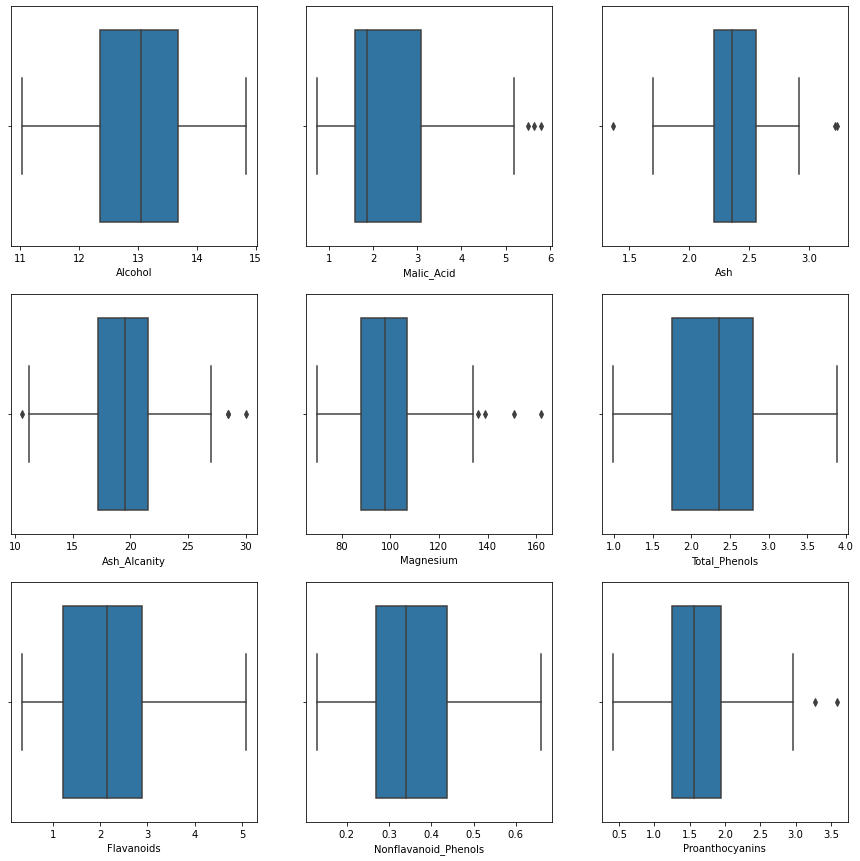

In [7]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [8]:
df = data.copy()

In [9]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
Q1 = df['Malic_Acid'].quantile(0.25)
Q2 = df['Malic_Acid'].quantile(0.50)
Q3 = df['Malic_Acid'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['Malic_Acid']=np.where(df['Malic_Acid']>upper_limit,upper_limit,np.where(df['Malic_Acid']<lower_limit,lower_limit,df['Malic_Acid']))

In [11]:
Q1 = df['Ash'].quantile(0.25)
Q2 = df['Ash'].quantile(0.50)
Q3 = df['Ash'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['Ash']=np.where(df['Ash']>upper_limit,upper_limit,np.where(df['Ash']<lower_limit,lower_limit,df['Ash']))

In [12]:
Q1 = df['Ash_Alcanity'].quantile(0.25)
Q2 = df['Ash_Alcanity'].quantile(0.50)
Q3 = df['Ash_Alcanity'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['Ash_Alcanity']=np.where(df['Ash_Alcanity']>upper_limit,upper_limit,np.where(df['Ash_Alcanity']<lower_limit,lower_limit,df['Ash_Alcanity']))

In [13]:
Q1 = df['Magnesium'].quantile(0.25)
Q2 = df['Magnesium'].quantile(0.50)
Q3 = df['Magnesium'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['Magnesium']=np.where(df['Magnesium']>upper_limit,upper_limit,np.where(df['Magnesium']<lower_limit,lower_limit,df['Magnesium']))

In [14]:
Q1 = df['Proanthocyanins'].quantile(0.25)
Q2 = df['Proanthocyanins'].quantile(0.50)
Q3 = df['Proanthocyanins'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['Proanthocyanins']=np.where(df['Proanthocyanins']>upper_limit,upper_limit,np.where(df['Proanthocyanins']<lower_limit,lower_limit,df['Proanthocyanins']))

IndexError: index 9 is out of bounds for axis 0 with size 9

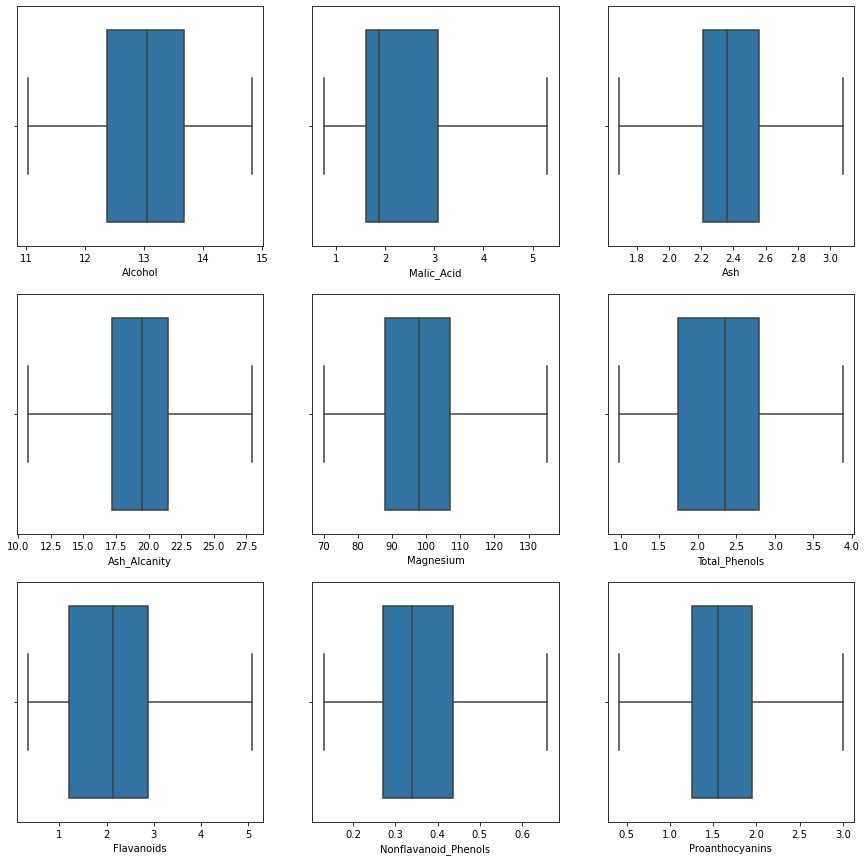

In [15]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(df[i], ax=ax[x])
plt.show()

### Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.iloc[:,1:])

## Model Building

### k-means clustering

In [17]:
from sklearn.cluster import KMeans
ks=range(1,6)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

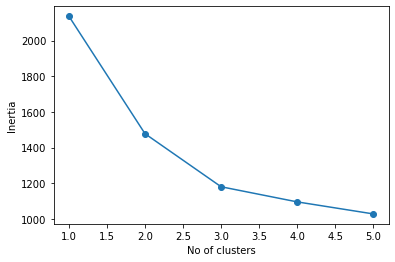

In [18]:
plt.plot(ks,inertia,'-o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data) 
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data,kmeans.labels_, metric='euclidean',random_state=42)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.266


### Heirachical Agglomertive clustering

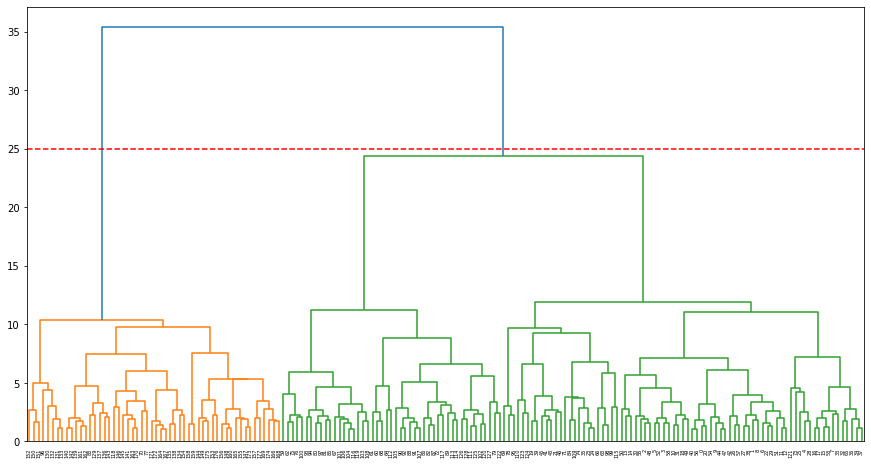

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(scaled_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,colors='r',linestyles='dashed' )
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(scaled_data)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data,labels,metric='euclidean',random_state=42)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.245


#### Comparing the silhouette  score k means has the highest score

In [24]:
df['cluster_no']= kmeans.labels_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [25]:
dt_new =  df.groupby(['cluster_no']).mean()

In [26]:
dt_new.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster_no,,,,,,,,,,,,,
0,13.400135,1.964324,2.433615,17.679730,106.972973,2.818919,2.912027,0.283108,1.970811,5.111892,1.051892,3.121892,1023.216216
1,12.328545,1.929682,2.216159,20.150909,89.818182,2.140000,1.938545,0.388545,1.445273,2.949818,1.072291,2.746182,481.436364
2,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [32]:
cluster0=df[df['cluster_no']==0]
cluster0.sort_values(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue','OD280', 'Proline'], 
                      ascending=[True,True,False,True,False,True,False,False,True,True,True,True,True])

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
120,11.45,2.40,2.42000,20.00,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,0
110,11.46,3.74,1.82000,19.50,107.0,3.18,2.58,0.24,3.00,2.90,0.75,2.81,562,0
121,11.56,2.05,3.07875,27.95,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,0
109,11.61,1.35,2.70000,20.00,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,0
96,11.81,2.12,2.74000,21.50,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14.38,1.87,2.38000,12.00,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
46,14.38,3.59,2.28000,16.00,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,0
6,14.39,1.87,2.45000,14.60,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
13,14.75,1.73,2.39000,11.40,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,0
